# *Reinforcement Learning Agent Simulation for N-Armed Bandit*

Hello Agent!
Welcome to the RL Simulation of the reknowned N-Armed bandit problem. So what is it about?

In this problem you are faced repeatedly with a choice among n different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps.

![nband](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/09/im_210.png)

This is the original form of the n-armed bandit problem, so named by analogy to a slot machine, or “one-armed bandit,” except that it has n levers instead of one. Each action selection is like a play of one of the slot machine’s levers, and the rewards are the payouts for hitting the jackpot. Through repeated action selections you are to maximize your winnings by concentrating your actions on the best levers.

>First let's import the required libraries and see what this code is actually doing. 

In [2]:
# imports required plotting and probabilistic functions
import random
import math
from matplotlib import pyplot as plt
from statistics import mean 

# collection of basic functions required for N-armed bandit
class rl_util:
    # Greedy Selection Strategy
    def argmax(l):
        """Takes a list of numbers 'l' and returns the index value of the maximum number"""
        f = lambda i: l[i]
        return max(range(len(l)), key=f)
    
    # e-greedy Selection Strategy
    def epsmax(l, e=0.1):
        """Takes a list of numbers 'l' and returns either index of maximum number with probability '1-e' or returns a random index with probability 'e'"""
        gen = random.random()
        if gen <= e:
            return random.randrange(len(l))
        else:
            return rl_util.argmax(l) 
        
    # Softmax Selection Strategy
    def softmax(l, t=0.1, interact=False):
        """Takes a list of numbers 'l' and returns index of the numbers having probabilities according to the boltzmann distribution"""
        weights = []
        z = 0
        for a in l:
            z += math.exp(a/t)
        for a in l:
            weights.append(math.exp(a/t)/z)
        prob = random.choices(range(len(l)),weights)
        
        if interact:
            plt.plot(weights)
            plt.xlabel("Action")
            plt.ylabel("Action selection distribution")
            plt.xticks([])
            plt.show()
        
        return prob[0]

    # generates a vector of random numbers
    def rand_vec(mu, sig):
        rvec = []
        for i in range(len(mu)):
            rvec.append(random.gauss(mu[i], sig[i]))
        return rvec

    # generates alpha values for incremental approach  
    def alpha_vec(k):
        alph = []
        for i in range(len(k)):
            alph.append(1/(k[i]+1))                        
        return alph

    # computes Q value
    def Q(alpha, r, q):
        return q + alpha * (r - q)

    # Vector version of Q value
    def Q_vec(alvec, rvec, qvec):
        Qvec = []
        for i in range(len(alvec)):
            Qvec.append(rl_util.Q(alvec[i], rvec[i], qvec[i]))
        return Qvec
    
    def n_armed_bandit_greedy(avec, svec, sample = 20, sz=1000, interact=True):        
        
        # initial sampling
        rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
        qvec = [mean(rvec[i]) for i in range(len(avec))]
        steps = [0 for i in range(len(avec))]        
        #plt.violinplot(rvec, showmeans=True, showextrema=False)
        rew = [0]

        for k in range(1, sz+1):       
            i = rl_util.argmax(qvec)                # take action 
            steps[i] += 1                           # increase step count for that bandit 
            rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
            qvec[i] = mean(rvec[i])                 # estimate value
            rew.append(rvec[i][-1]+rew[-1])         # current total reward
            
            if interact:
                plt.violinplot(rvec,showmeans=True,showextrema=False)
                plt.plot(i+1,rvec[i][-1], "o", label="current reward")
                plt.xlabel("Action")
                plt.ylabel("{}-Armed Bandit Reward Distribution".format(len(avec)))
                plt.xticks([])
                plt.legend(loc='upper left')
                plt.show()
                a=input("To quit Press Q else Press any key to continue: ")
                if a=='q' or a=='Q':
                    break
        return rew
            
    def n_armed_bandit_eps_greedy(avec, svec, sample = 20, eps=0.1, sz=1000, interact=True):        
        
        # initial sampling
        rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
        qvec = [mean(rvec[i]) for i in range(len(avec))]
        steps = [0 for i in range(len(avec))]        
        #plt.violinplot(rvec, showmeans=True, showextrema=False)
        rew=[0]

        for k in range(1, sz+1):       
            i = rl_util.epsmax(qvec, eps)                # take action 
            steps[i] += 1                           # increase step count for that bandit 
            rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
            qvec[i] = mean(rvec[i])                 # estimate value
            rew.append(rvec[i][-1]+rew[-1])         # current total reward

            if interact:
                plt.violinplot(rvec,showmeans=True,showextrema=False)
                plt.plot(i+1,rvec[i][-1], "o", label="current reward")
                plt.xlabel("Action")
                plt.ylabel("{}-Armed Bandit Reward Distribution".format(len(avec)))
                plt.xticks([])
                plt.legend(loc='upper left')
                plt.show()
                a=input("To quit Press Q else Press any key to continue: ")
                if a=='q' or a=='Q':
                    break
        return rew
                    
    def n_armed_bandit_softy(avec, svec, sample = 20, eps=0.1, sz=1000, interact=True):        
        
        # initial sampling
        rvec = [[random.gauss(avec[i], svec[i]) for k in range(sample)] for i in range(len(avec))]
        qvec = [mean(rvec[i]) for i in range(len(avec))]
        steps = [0 for i in range(len(avec))]        
        #plt.violinplot(rvec, showmeans=True, showextrema=False)
        rew=[0]

        for k in range(1, sz+1):       
            i = rl_util.softmax(qvec, eps, interact)# take action 
            steps[i] += 1                           # increase step count for that bandit 
            rvec[i].append(random.gauss(avec[i], svec[i]))   # environment will generate next reward  
            qvec[i] = mean(rvec[i])                 # estimate value
            rew.append(rvec[i][-1]+rew[-1])         # current total reward
            
            if interact:
                plt.violinplot(rvec,showmeans=True,showextrema=False)
                plt.plot(i+1,rvec[i][-1], "o", label="current reward")
                plt.xlabel("Action")
                plt.ylabel("{}-Armed Bandit Reward Distribution".format(len(avec)))
                plt.xticks([])
                plt.legend(loc='upper left')
                plt.show()
                a=input("To quit Press Q else Press any key to continue: ")
                if a=='q' or a=='Q':
                    break
        return rew


## 1. Greedy Method

> In this method the action selection takes place by repeatedly choosing the one with the highest average reward. This method sticks to exploit over explore strategy and hence is ineffective over long run.

Enter N for N-armed-bandit: 4
Enter initial sampling size: 2
Now enter n reward means: 
mean1 : 4
variance1 : 10
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 15
mean4 : 10
variance4 : 5


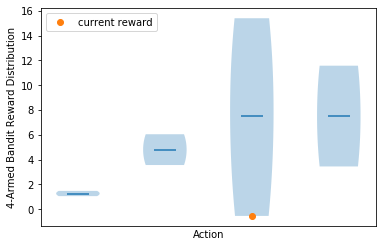

To quit Press Q else Press any key to continue: 


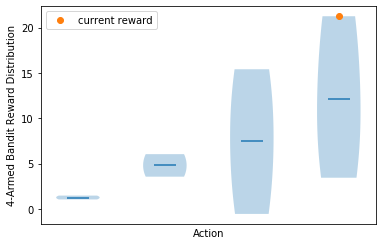

To quit Press Q else Press any key to continue: 


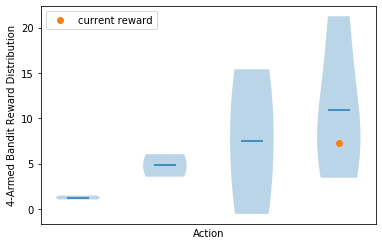

To quit Press Q else Press any key to continue: 


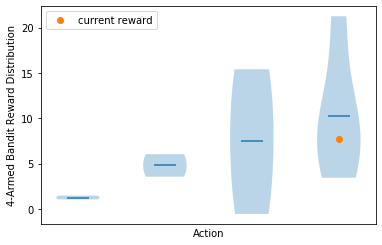

To quit Press Q else Press any key to continue: 


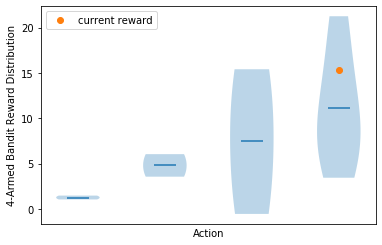

To quit Press Q else Press any key to continue: 


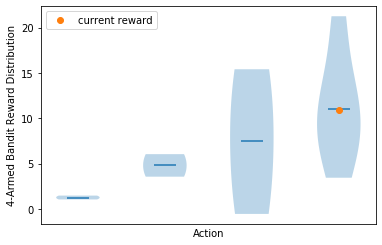

To quit Press Q else Press any key to continue: 


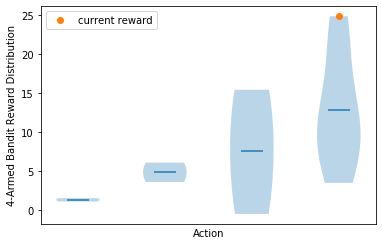

To quit Press Q else Press any key to continue: 


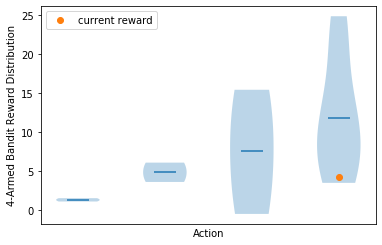

To quit Press Q else Press any key to continue: 


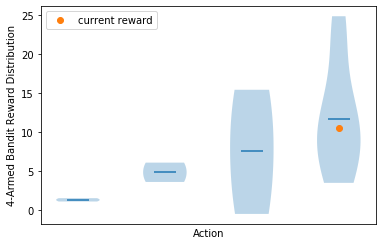

To quit Press Q else Press any key to continue: 


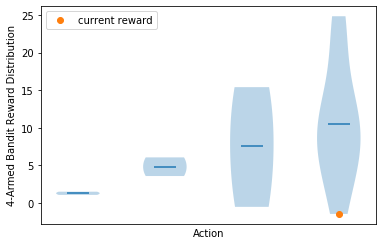

To quit Press Q else Press any key to continue: 


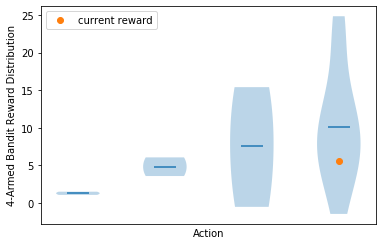

To quit Press Q else Press any key to continue: 


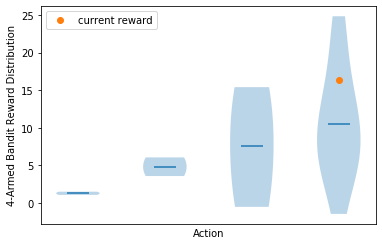

To quit Press Q else Press any key to continue: 


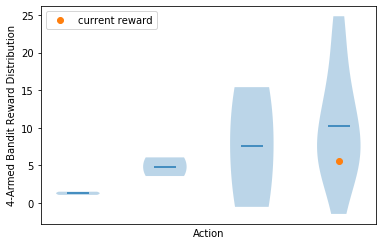

To quit Press Q else Press any key to continue: 


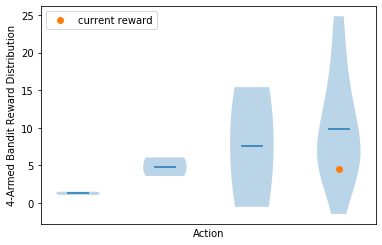

To quit Press Q else Press any key to continue: q


In [28]:
n = int(input("Enter N for N-armed-bandit: "))
sample = int(input("Enter initial sampling size: "))
print("Now enter n reward means: ")
avec = []
svec = []
for i in range(1, n+1):
    avec.append(int(input("mean{} : ".format(i))))
    svec.append(int(input("variance{} : ".format(i))))

grew=rl_util.n_armed_bandit_greedy(avec,svec,sample)
print("Your Total reward is: {}".format(grew))

## 2. Epsilon Greedy Method

> In this case the epsilon greedy method modifies the original greedy method by randomly choosing non greedy options with a finite probability epsilon. This overcomes the drawback of greedy exploit nature by encouraging the algorithm to explore non greedy solutions.

Enter N for N-armed-bandit: 4
Enter initial sampling size: 2
Now enter n reward means: 
mean1 : 4
variance1 : 10
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 15
mean4 : 10
variance4 : 5


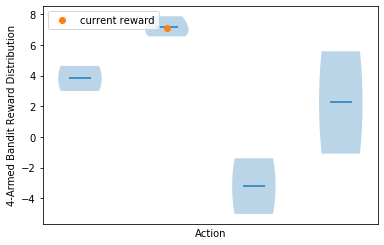

To quit Press Q else Press any key to continue: 


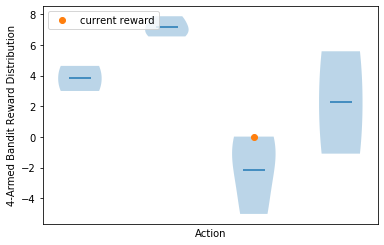

To quit Press Q else Press any key to continue: 


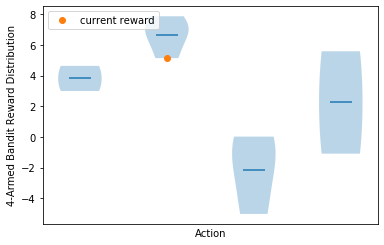

To quit Press Q else Press any key to continue: 


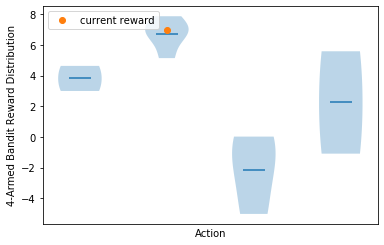

To quit Press Q else Press any key to continue: 


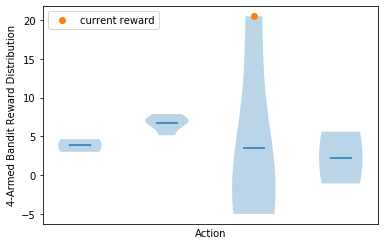

To quit Press Q else Press any key to continue: 


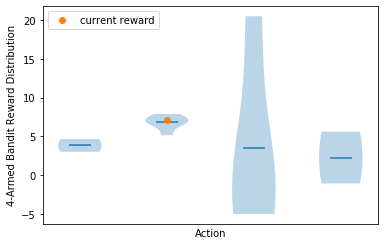

To quit Press Q else Press any key to continue: 


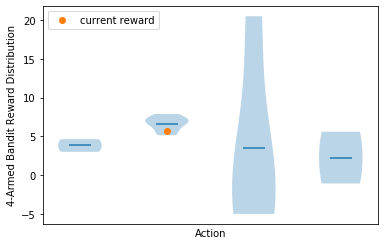

To quit Press Q else Press any key to continue: 


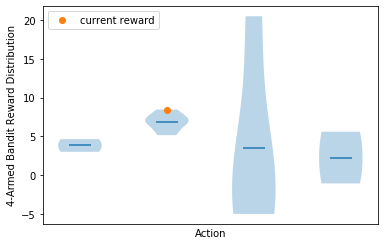

To quit Press Q else Press any key to continue: 


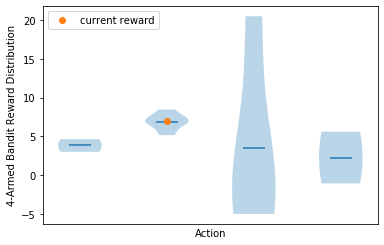

To quit Press Q else Press any key to continue: 


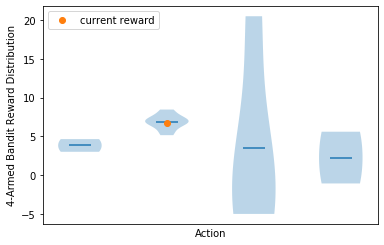

To quit Press Q else Press any key to continue: 


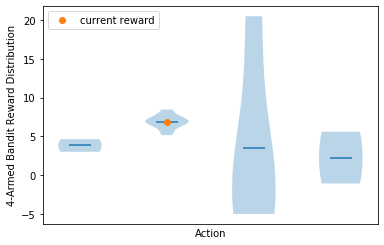

To quit Press Q else Press any key to continue: 


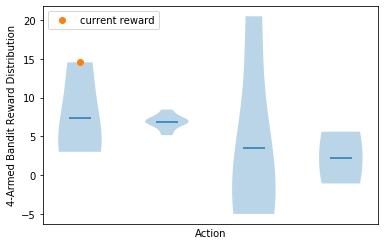

To quit Press Q else Press any key to continue: 


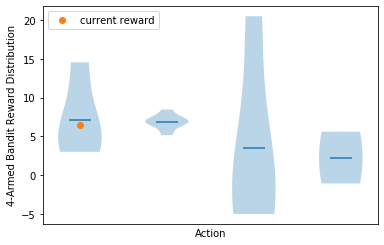

To quit Press Q else Press any key to continue: 


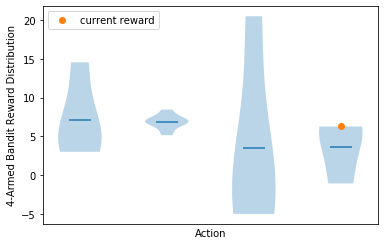

To quit Press Q else Press any key to continue: 


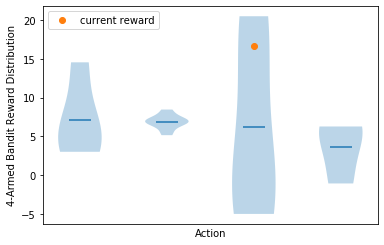

To quit Press Q else Press any key to continue: q


In [30]:
n = int(input("Enter N for N-armed-bandit: "))
sample = int(input("Enter initial sampling size: "))
print("Now enter n reward means: ")
avec = []
svec = []
for i in range(1, n+1):
    avec.append(int(input("mean{} : ".format(i))))
    svec.append(int(input("variance{} : ".format(i))))

egrew=rl_util.n_armed_bandit_eps_greedy(avec,svec,sample)
print("Your Total reward is: {}".format(egrew))

## 3. Softmax Method


> Although the previous action selection method of epsilon greedy selection was better than traditional greedy method, it still had a disadvantage of randomly choosing non greedy solutions. Softmax method overcomes this by grading all the solutions according to the boltzmann or gibbs distribution. This helps the algorithm to explore the next best solution instead of randomly exploring less fruitful choices.

<img src="https://www.oreilly.com/library/view/hands-on-reinforcement-learning/9781788836524/assets/ddde8a7b-1d01-431d-a821-47005df31263.png" alt="drawing" width="250"/>

Enter N for N-armed-bandit: 4
Enter initial sampling size: 2
Now enter n reward means: 
mean1 : 4
variance1 : 10
mean2 : 6
variance2 : 2
mean3 : 8
variance3 : 15
mean4 : 10
variance4 : 5


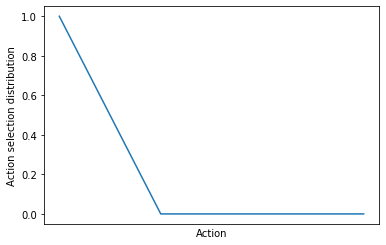

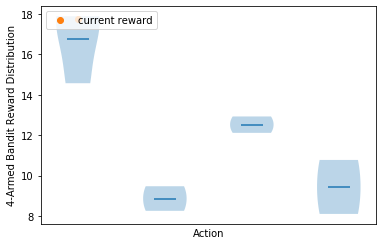

To quit Press Q else Press any key to continue: 


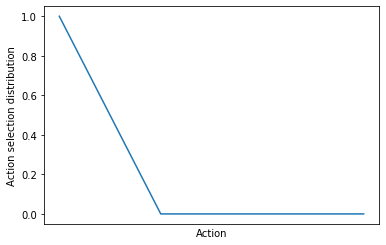

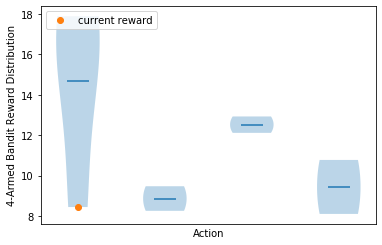

To quit Press Q else Press any key to continue: 


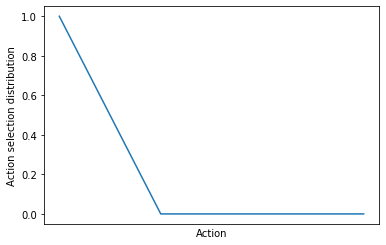

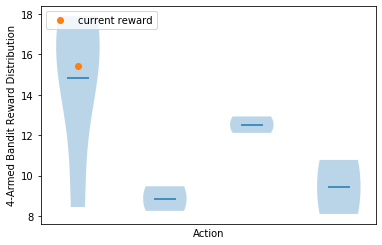

To quit Press Q else Press any key to continue: 


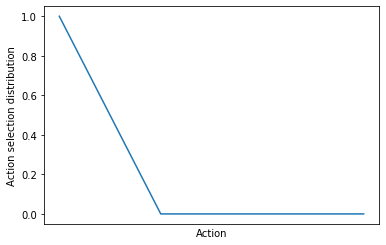

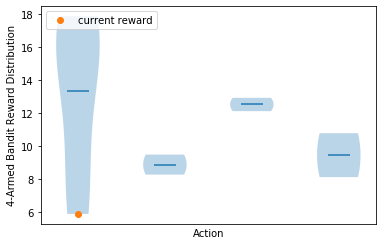

To quit Press Q else Press any key to continue: 


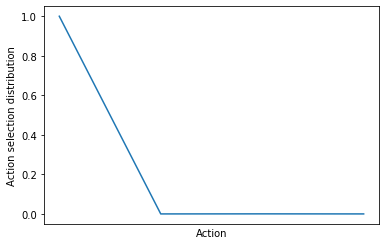

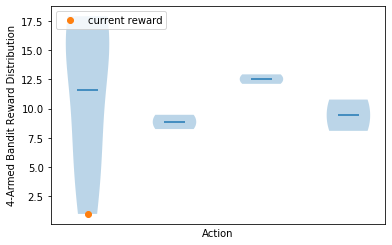

To quit Press Q else Press any key to continue: 


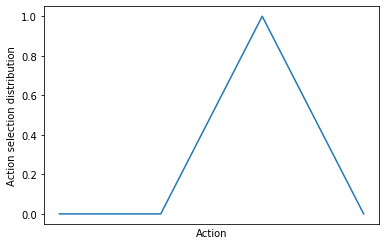

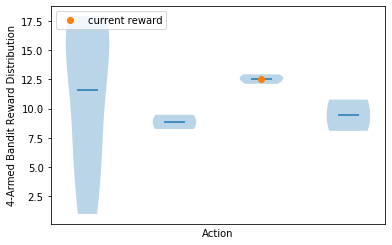

To quit Press Q else Press any key to continue: 


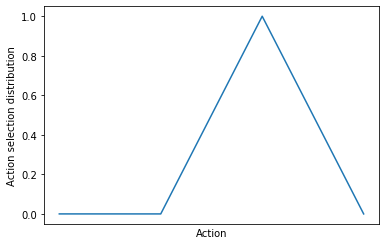

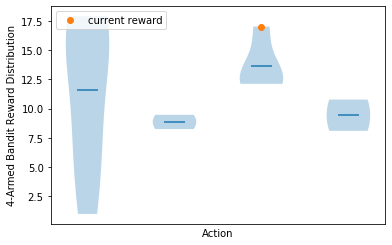

To quit Press Q else Press any key to continue: 


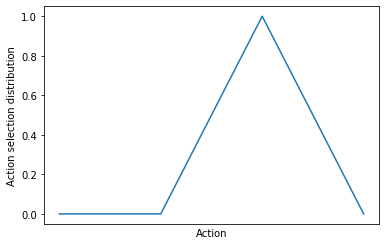

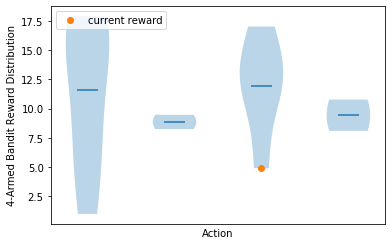

To quit Press Q else Press any key to continue: 


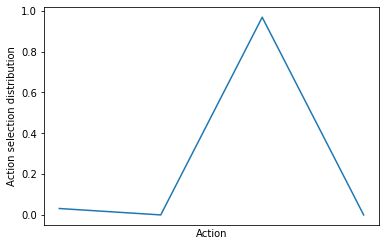

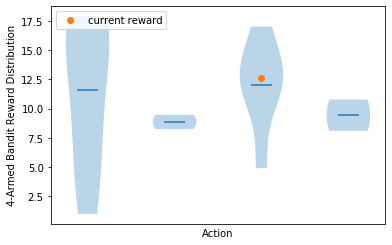

To quit Press Q else Press any key to continue: 


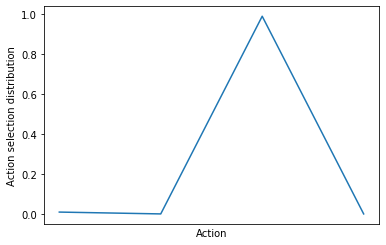

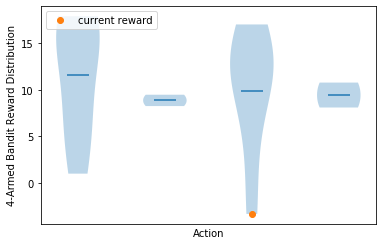

To quit Press Q else Press any key to continue: 


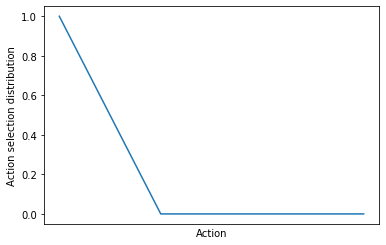

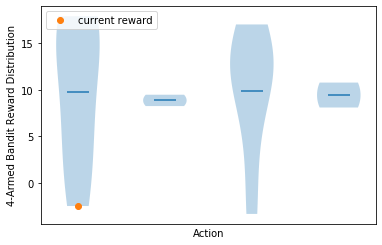

To quit Press Q else Press any key to continue: 


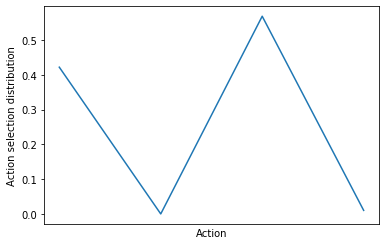

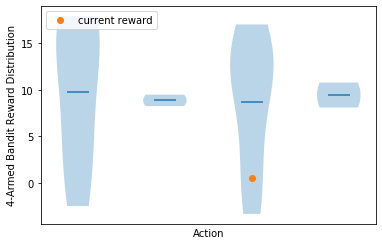

To quit Press Q else Press any key to continue: 


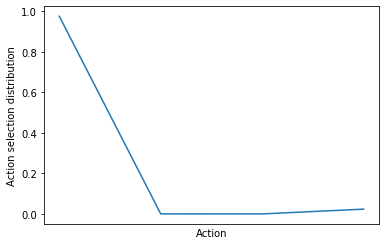

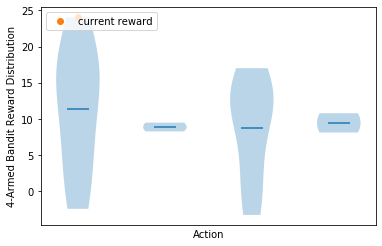

To quit Press Q else Press any key to continue: 


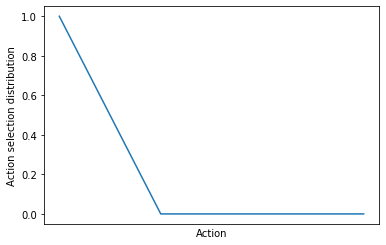

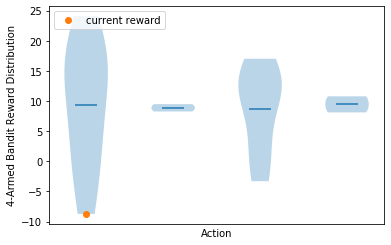

To quit Press Q else Press any key to continue: 


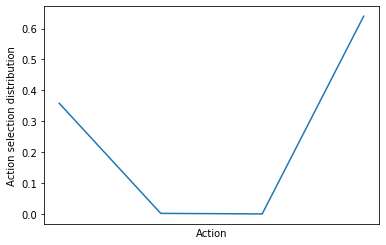

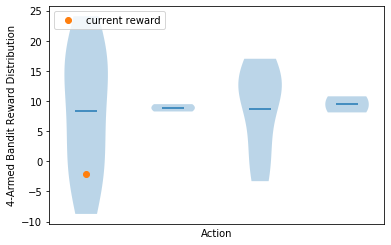

To quit Press Q else Press any key to continue: 


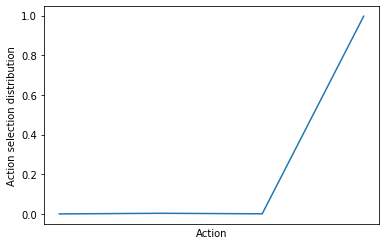

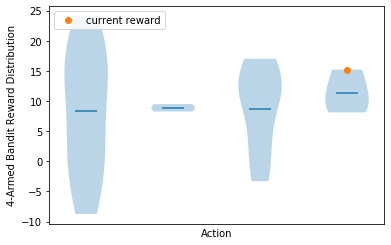

To quit Press Q else Press any key to continue: 


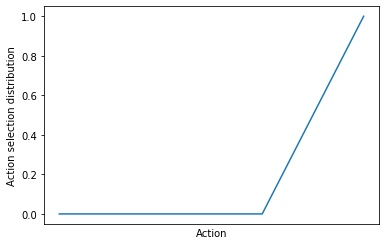

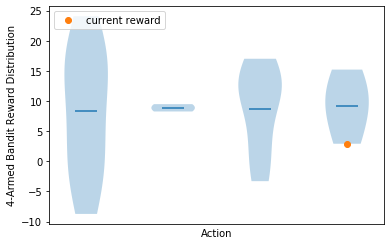

To quit Press Q else Press any key to continue: q


In [36]:
n = int(input("Enter N for N-armed-bandit: "))
sample = int(input("Enter initial sampling size: "))
print("Now enter n reward means: ")
avec = []
svec = []
for i in range(1, n+1):
    avec.append(int(input("mean{} : ".format(i))))
    svec.append(int(input("variance{} : ".format(i))))

sgrew=rl_util.n_armed_bandit_softy(avec,svec,sample)
print("Your Total reward is: {}".format(sgrew))

> Let us compare all of this methods by checking their cumulative rewards.

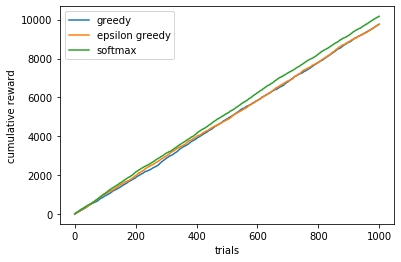

In [66]:
# Cumulative Reward plots for comparison

grew=rl_util.n_armed_bandit_greedy([4,6,8,10],[10,2,15,5],interact=False, sz=1000)
egrew=rl_util.n_armed_bandit_eps_greedy([4,6,8,10],[10,2,15,5],interact=False, sz=1000)
sgrew=rl_util.n_armed_bandit_softy([4,6,8,10],[10,2,15,5],interact=False, sz=1000)

plt.plot(grew,label="greedy")
plt.plot(egrew,label="epsilon greedy")
plt.plot(sgrew,label="softmax")
plt.xlabel("trials")
plt.ylabel("cumulative reward")
plt.legend(loc='best')
plt.show()
